In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
%matplotlib inline

data = pd.read_csv('spiral.txt', header=None)
data.columns = ['feature1', 'feature2', 'gtl']
data

,feature1,feature2,gtl
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


Task 1

In [11]:
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[10.42783019 16.8259434   2.        ]
 [21.94433962  9.81462264  2.04716981]
 [23.119      22.7565      2.        ]]


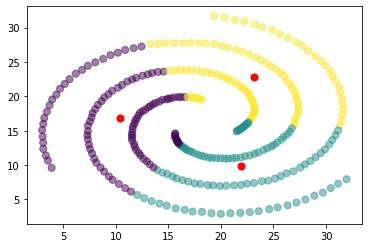

In [12]:
plt.scatter(data['feature1'], data['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

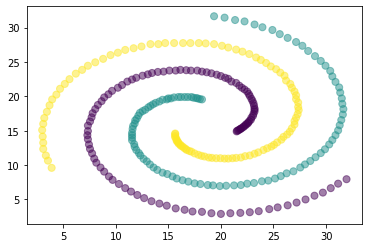

In [13]:
clustering = SpectralClustering(n_clusters=3).fit(data)
plt.scatter(data['feature1'], data['feature2'], c= clustering.labels_.astype(float), s=50, alpha=0.5)
plt.show()

In [14]:
label = kmeans.labels_
kmeanSil = metrics.silhouette_score(data, label)
kmeanBou = metrics.davies_bouldin_score(data, label)
kmeanNorm = metrics.normalized_mutual_info_score(data['gtl'], label)
print("KMeans Silhouette Score: {}".format(kmeanSil)) 
print("KMeans Davies Bouldin Score: {}".format(kmeanBou))
print("KMeans Normalized Mutual Information Score: {}".format(kmeanNorm))

label = clustering.labels_
specSil = metrics.silhouette_score(data, label)
specBou = metrics.davies_bouldin_score(data, label)
specNorm = metrics.normalized_mutual_info_score(data['gtl'], label)
print("Spectral Clustering Silhouette Score: {}".format(specSil)) 
print("Spectral Clustering Davies Bouldin Score: {}".format(specBou))
print("Spectral Clustering Normalized Mutual Information Score: {}".format(specNorm))

KMeans Silhouette Score: 0.35599482745445993
KMeans Davies Bouldin Score: 0.8917366465333739
KMeans Normalized Mutual Information Score: 0.0003803714086029412
Spectral Clustering Silhouette Score: 0.008339684452069632
Spectral Clustering Davies Bouldin Score: 5.538504020627215
Spectral Clustering Normalized Mutual Information Score: 1.0


Task 2

In [49]:
def calcK(xi, xj, sigma):
    a = pow((xi[0] - xj[0]), 2)
    b = pow((xi[1] - xj[1]), 2)
    return np.exp(-(abs(a + b) / 2 * pow(sigma, 2)))


print(calcK([1,5], [2, 2], 1))


0.006737946999085467


In [21]:
labelK = kmeans.labels_
labelS = clustering.labels_


In [22]:
data['k'] = labelK
data['s'] = labelS
data

,feature1,feature2,gtl,k,s
0,31.95,7.95,3,1,0
1,31.15,7.30,3,1,0
2,30.45,6.65,3,1,0
3,29.70,6.00,3,1,0
4,28.90,5.55,3,1,0
...,...,...,...,...,...
307,15.75,13.85,2,0,2
308,15.65,14.05,2,0,2
309,15.65,14.25,2,0,2
310,15.65,14.50,2,0,2


In [55]:
n = 0
sum = 0
for index1, row1 in data.iterrows():
    n += 1
    tmp1 = 0
    tmp2 = 0
    for index2, row2 in data.iterrows():
        if (index1 != index2):
            if(row1[3] == row2[3]):
                tmp1 += calcK(row1, row2, 1)
            tmp2 += calcK(row1, row2, 1)
    
    sum += tmp1 / tmp2

t = (sum / n)
print("t for KMeans: {}".format(t))
        
    

t for KMeans: 0.9282683212068821


In [56]:
n = 0
sum = 0
for index1, row1 in data.iterrows():
    n += 1
    tmp1 = 0
    tmp2 = 0
    for index2, row2 in data.iterrows():
        if (index1 != index2):
            if(row1[4] == row2[4]):
                tmp1 += calcK(row1, row2, 1)
            tmp2 += calcK(row1, row2, 1)
    
    sum += tmp1 / tmp2

t = (sum / n)
print("t for Spectral Clustering: {}".format(t))

t for Spectral Clustering: 0.9994790295553357


Task 3

In [61]:
n = 1000
male = 0.5
female = 0.5
hdisease = 0.3

d = [
    [1, 1, 300, 125, 875],
    [2, 1, 500, 150, 850],
    [3, 0, 500, 400, 600],
    [4, 0, 342, 240, 760],
    [5, 0, 2, 2, 998],
    [6, 0, 500, 352, 648],
    [7, 1, 260, 100, 900],
    [8, 1, 120, 32, 968],
    [9, 1, 240, 100, 900],
    [10, 1, 80, 32, 968],
    [11, 1, 200, 100, 900],
    [12, 0, 251, 203, 797]
]

d

[[1, 1, 300, 125, 875],
 [2, 1, 500, 150, 850],
 [3, 0, 500, 400, 600],
 [4, 0, 342, 240, 760],
 [5, 0, 2, 2, 998],
 [6, 0, 500, 352, 648],
 [7, 1, 260, 100, 900],
 [8, 1, 120, 32, 968],
 [9, 1, 240, 100, 900],
 [10, 1, 80, 32, 968],
 [11, 1, 200, 100, 900],
 [12, 0, 251, 203, 797]]

In [82]:
liftedD = []
for r in d:
    lift = 0
    if (r[1] == 1):
        lift= (r[3] / (r[2] * 300)) * 1000
    else:
        lift = (r[3] / (r[2] * 700)) * 1000
    if (lift > 1):
        liftedD.append(r)
        print(r)

[1, 1, 300, 125, 875]
[3, 0, 500, 400, 600]
[4, 0, 342, 240, 760]
[5, 0, 2, 2, 998]
[6, 0, 500, 352, 648]
[7, 1, 260, 100, 900]
[9, 1, 240, 100, 900]
[10, 1, 80, 32, 968]
[11, 1, 200, 100, 900]
[12, 0, 251, 203, 797]


In [95]:
def mi(row):
    pX = 0
    if (row[1] == 1):
        pX = 300
    else:
        pX = 700 
    pX = pX / 1000
    pC = row[2] / 1000
    pXC = row[3] / 1000
    pNotX = 1 - pX
    pNotC = 1 - pC
    pNotXC = (pC) * (1 - (pXC/pC))
    pXNotC = (pX) * (1 - (pXC/pX))
    pNotXNotC = (pNotC) * (1 - (pXNotC/pNotC))
    
    #print(pX, pC, pXC, pNotX, pNotC, pNotXC, pXNotC, pNotXNotC)
    
    top = pow(pXC, pXC) * pow(pXNotC, pXNotC) * pow(pNotXC, pNotXC) * pow(pNotXNotC, pNotXNotC)
    bottom = pow(pX, pX) * pow(pNotX, pNotX) * pow(pC, pC) * pow(pNotC, pNotC)
    
    return np.log2(top / bottom)

prunedD = []

for r in liftedD:
    tmp = mi(r)
    if (tmp > 0.0015):
        prunedD.append(r)
        print(r)
        

        
        

[1, 1, 300, 125, 875]
[3, 0, 500, 400, 600]
[7, 1, 260, 100, 900]
[9, 1, 240, 100, 900]
[10, 1, 80, 32, 968]
[11, 1, 200, 100, 900]
[12, 0, 251, 203, 797]
